In [1]:
import json
from pathlib import Path


def is_data_file(f):
    return Path(f).suffix == '.json'

# Load data
DATA_PATH = Path('../data/raw')

data = []
for filepath in DATA_PATH.iterdir():
    if not is_data_file(filepath):
        continue
    with open(filepath, 'r') as shot_file:
        data.append(json.load(shot_file))

First, we need to process the data into a nice format for plotting

In [2]:
list(enumerate(d['shot']['body_part']['name'] for d in data))

[(0, 'Right Foot'),
 (1, 'Head'),
 (2, 'Left Foot'),
 (3, 'Right Foot'),
 (4, 'Left Foot'),
 (5, 'Right Foot'),
 (6, 'Right Foot'),
 (7, 'Right Foot'),
 (8, 'Right Foot'),
 (9, 'Right Foot'),
 (10, 'Left Foot'),
 (11, 'Left Foot'),
 (12, 'Head'),
 (13, 'Right Foot'),
 (14, 'Left Foot'),
 (15, 'Head'),
 (16, 'Right Foot'),
 (17, 'Right Foot'),
 (18, 'Left Foot'),
 (19, 'Right Foot'),
 (20, 'Head'),
 (21, 'Right Foot'),
 (22, 'Left Foot'),
 (23, 'Left Foot'),
 (24, 'Right Foot'),
 (25, 'Right Foot'),
 (26, 'Right Foot'),
 (27, 'Left Foot'),
 (28, 'Head'),
 (29, 'Left Foot'),
 (30, 'Right Foot'),
 (31, 'Left Foot'),
 (32, 'Left Foot'),
 (33, 'Right Foot'),
 (34, 'Left Foot'),
 (35, 'Head'),
 (36, 'Left Foot'),
 (37, 'Right Foot'),
 (38, 'Other'),
 (39, 'Left Foot'),
 (40, 'Left Foot'),
 (41, 'Left Foot'),
 (42, 'Right Foot'),
 (43, 'Right Foot'),
 (44, 'Left Foot'),
 (45, 'Left Foot'),
 (46, 'Right Foot'),
 (47, 'Left Foot'),
 (48, 'Left Foot'),
 (49, 'Left Foot'),
 (50, 'Left Foot'),
 (5

In [3]:
shot = data[8]

shot['shot']

{'type': {'id': 87, 'name': 'Open Play'},
 'outcome': {'id': 96, 'name': 'Blocked'},
 'body_part': {'id': 40, 'name': 'Right Foot'},
 'technique': {'id': 93, 'name': 'Normal'},
 'key_pass_id': '3f6fbdd6-80e5-4c5e-811c-5bf3ab337d6a',
 'end_location': [107.0, 30.0],
 'freeze_frame': [{'player': {'id': 3468, 'name': 'Jordan Pickford'},
   'location': [119.0, 38.0],
   'position': {'id': 1, 'name': 'Goalkeeper'},
   'teammate': False},
  {'player': {'id': 15784, 'name': 'Bernard Anício Caldeira Duarte'},
   'location': [94.0, 55.0],
   'position': {'id': 21, 'name': 'Left Wing'},
   'teammate': False},
  {'player': {'id': 4589, 'name': 'Séamus Coleman'},
   'location': [107.0, 46.0],
   'position': {'id': 2, 'name': 'Right Back'},
   'teammate': False},
  {'player': {'id': 3456, 'name': 'Kurt Happy Zouma'},
   'location': [108.0, 39.0],
   'position': {'id': 5, 'name': 'Left Center Back'},
   'teammate': False},
  {'player': {'id': 3438, 'name': 'Michael Keane'},
   'location': [110.0, 32.

Then we can get to the plotting.

First, let's just set up a basic pitch.

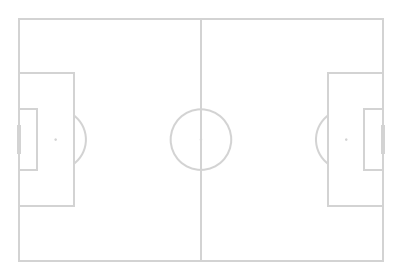

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

def init_pitch():
    pitch = Pitch(pitch_color=None, line_color='lightgray', stripe=False)
    fig, ax = pitch.draw()
    return fig, ax

__ = init_pitch()

Very nice!

Now let's layer on the detail.

In [5]:
shot

{'id': '422e9f28-77cc-40c6-aed5-78940f27970e',
 'shot': {'type': {'id': 87, 'name': 'Open Play'},
  'outcome': {'id': 96, 'name': 'Blocked'},
  'body_part': {'id': 40, 'name': 'Right Foot'},
  'technique': {'id': 93, 'name': 'Normal'},
  'key_pass_id': '3f6fbdd6-80e5-4c5e-811c-5bf3ab337d6a',
  'end_location': [107.0, 30.0],
  'freeze_frame': [{'player': {'id': 3468, 'name': 'Jordan Pickford'},
    'location': [119.0, 38.0],
    'position': {'id': 1, 'name': 'Goalkeeper'},
    'teammate': False},
   {'player': {'id': 15784, 'name': 'Bernard Anício Caldeira Duarte'},
    'location': [94.0, 55.0],
    'position': {'id': 21, 'name': 'Left Wing'},
    'teammate': False},
   {'player': {'id': 4589, 'name': 'Séamus Coleman'},
    'location': [107.0, 46.0],
    'position': {'id': 2, 'name': 'Right Back'},
    'teammate': False},
   {'player': {'id': 3456, 'name': 'Kurt Happy Zouma'},
    'location': [108.0, 39.0],
    'position': {'id': 5, 'name': 'Left Center Back'},
    'teammate': False},
 

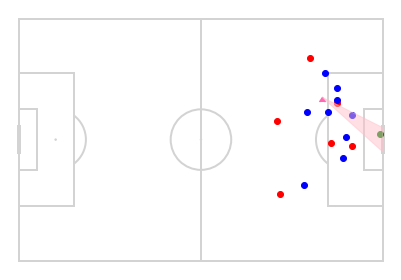

In [15]:
unzip = lambda l: zip(*l)


def is_gk(player):
    return player['position']['name'] == 'Goalkeeper'


def shot_marker(shot):
    body_part = shot['shot']['body_part']['name']
    if body_part == 'Right Foot':
        return matplotlib.markers.CARETUP
    if body_part == 'Left Foot':
        return matplotlib.markers.CARETDOWN
    if body_part == 'Head':
        return 'P'
    return 'P'


def extract_xy(freeze_frame, condition=lambda x: True):
    return unzip(
        [p['location'] for p in freeze_frame if condition(p)]
    )


fig, ax = init_pitch()


# Add shot angle
shot_x, shot_y, *__ = shot['location']
post_x = 120
post_y1, post_y2 = (36, 44)
tri = plt.Polygon([[shot_x, shot_y], [post_x, post_y1], [post_x, post_y2]], color='pink', alpha = 0.5)

# Add the teammates
x, y = extract_xy(shot['shot']['freeze_frame'], lambda x: x['teammate'])
ax.scatter(x, y, color = 'red') 

# Add the outfield opposition
x, y = extract_xy(shot['shot']['freeze_frame'], lambda x: not x['teammate'] and not is_gk(x))
ax.scatter(x, y, color = 'blue')

# Add the goalkeeper
x, y = extract_xy(shot['shot']['freeze_frame'], lambda x: not x['teammate'] and is_gk(x))
ax.scatter(x, y, color = 'green')

# Add the shooter/ball/shot location and metadata (body part)
ax.scatter(shot_x, shot_y, color = 'hotpink', marker=shot_marker(shot))

fig.gca().add_patch(tri)

In [118]:
fig.savefig(
    Path('../data/processed/TEST.png'),
    dpi=280
)